#  Naive Bayes model

### Importing libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

### Importing datasets

In [29]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [30]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [31]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### Spliting the dataset into training and test set

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
print(X_train)

[[    29  83000]
 [    26  30000]
 [    36 144000]
 [    48 141000]
 [    35  50000]
 [    33  69000]
 [    50  20000]
 [    40  75000]
 [    29  80000]
 [    59  83000]
 [    35 108000]
 [    18  82000]
 [    43 129000]
 [    39 122000]
 [    49  86000]
 [    39  77000]
 [    46  32000]
 [    19  76000]
 [    59 143000]
 [    26  43000]
 [    35  27000]
 [    35  47000]
 [    40  57000]
 [    25  90000]
 [    30  87000]
 [    48  35000]
 [    48 131000]
 [    36  54000]
 [    49  74000]
 [    35  65000]
 [    41  51000]
 [    54 104000]
 [    30  17000]
 [    29  28000]
 [    25  80000]
 [    27  54000]
 [    39  75000]
 [    20  36000]
 [    42 104000]
 [    36 125000]
 [    37  72000]
 [    33  31000]
 [    30 107000]
 [    42  70000]
 [    41  60000]
 [    23  20000]
 [    33  43000]
 [    21  68000]
 [    37  57000]
 [    28  59000]
 [    37  33000]
 [    39  59000]
 [    49  39000]
 [    53 143000]
 [    32 120000]
 [    33  51000]
 [    40  78000]
 [    27  88000]
 [    49  3600

In [34]:
print(y_train)

[0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1]


In [35]:
print(X_test)

[[    29  43000]
 [    44  39000]
 [    46  41000]
 [    22  27000]
 [    26  84000]
 [    35  61000]
 [    23  63000]
 [    31  66000]
 [    59  42000]
 [    27  84000]
 [    24  23000]
 [    46 117000]
 [    39  71000]
 [    60 108000]
 [    40  61000]
 [    35  55000]
 [    41  80000]
 [    50  88000]
 [    37  53000]
 [    39  96000]
 [    44 139000]
 [    60  42000]
 [    49 141000]
 [    34  43000]
 [    56  60000]
 [    45  32000]
 [    19  19000]
 [    18  44000]
 [    34  72000]
 [    36  33000]
 [    38  51000]
 [    41  79000]
 [    35  53000]
 [    34 115000]
 [    26  17000]
 [    26  15000]
 [    53  34000]
 [    38  80000]
 [    39  71000]
 [    35  20000]
 [    35  44000]
 [    37  71000]
 [    35  60000]
 [    52 150000]
 [    39 134000]
 [    30  49000]
 [    40  47000]
 [    35  75000]
 [    28  89000]
 [    52 114000]
 [    31  74000]
 [    20  49000]
 [    41  63000]
 [    54  26000]
 [    30  62000]
 [    55  39000]
 [    58  47000]
 [    35  88000]
 [    58 10100

In [36]:
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1]


### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print(X_train)

[[-0.84134498  0.37737443]
 [-1.13063266 -1.17949016]
 [-0.16634041  2.16923745]
 [ 0.99081028  2.08111304]
 [-0.26276964 -0.59199409]
 [-0.45562809 -0.03387282]
 [ 1.18366873 -1.47323819]
 [ 0.21937649  0.142376  ]
 [-0.84134498  0.28925002]
 [ 2.05153175  0.37737443]
 [-0.26276964  1.11174452]
 [-1.90206645  0.34799963]
 [ 0.50866416  1.72861539]
 [ 0.12294726  1.52299177]
 [ 1.08723951  0.46549884]
 [ 0.12294726  0.20112561]
 [ 0.79795183 -1.12074055]
 [-1.80563723  0.1717508 ]
 [ 2.05153175  2.13986264]
 [-1.13063266 -0.79761771]
 [-0.26276964 -1.26761457]
 [-0.26276964 -0.6801185 ]
 [ 0.21937649 -0.38637046]
 [-1.22706188  0.58299805]
 [-0.74491576  0.49487364]
 [ 0.99081028 -1.03261614]
 [ 0.99081028  1.787365  ]
 [-0.16634041 -0.47449487]
 [ 1.08723951  0.1130012 ]
 [-0.26276964 -0.15137203]
 [ 0.31580571 -0.56261928]
 [ 1.56938563  0.9942453 ]
 [-0.74491576 -1.56136261]
 [-0.84134498 -1.23823977]
 [-1.22706188  0.28925002]
 [-1.03420343 -0.47449487]
 [ 0.12294726  0.142376  ]
 

In [39]:
print(X_test)

[[-0.84134498 -0.79761771]
 [ 0.60509338 -0.91511693]
 [ 0.79795183 -0.85636732]
 [-1.51634955 -1.26761457]
 [-1.13063266  0.40674923]
 [-0.26276964 -0.26887125]
 [-1.41992033 -0.21012164]
 [-0.64848653 -0.12199723]
 [ 2.05153175 -0.82699252]
 [-1.03420343  0.40674923]
 [-1.32349111 -1.38511378]
 [ 0.79795183  1.37611775]
 [ 0.12294726  0.02487679]
 [ 2.14796097  1.11174452]
 [ 0.21937649 -0.26887125]
 [-0.26276964 -0.44512007]
 [ 0.31580571  0.28925002]
 [ 1.18366873  0.52424845]
 [-0.06991119 -0.50386968]
 [ 0.12294726  0.75924688]
 [ 0.60509338  2.02236343]
 [ 2.14796097 -0.82699252]
 [ 1.08723951  2.08111304]
 [-0.35919886 -0.79761771]
 [ 1.76224408 -0.29824605]
 [ 0.70152261 -1.12074055]
 [-1.80563723 -1.502613  ]
 [-1.90206645 -0.76824291]
 [-0.35919886  0.05425159]
 [-0.16634041 -1.09136575]
 [ 0.02651804 -0.56261928]
 [ 0.31580571  0.25987522]
 [-0.26276964 -0.50386968]
 [-0.35919886  1.31736814]
 [-1.13063266 -1.56136261]
 [-1.13063266 -1.62011221]
 [ 1.4729564  -1.06199094]
 

### Training the Naive Bayes model

In [40]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

### Predicting a new result

In [41]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the test set result

In [42]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


### Making the confusion matrix

In [43]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[54  4]
 [ 3 19]]


0.9125

### Visualising the Training set result

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_19214/1338405778.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


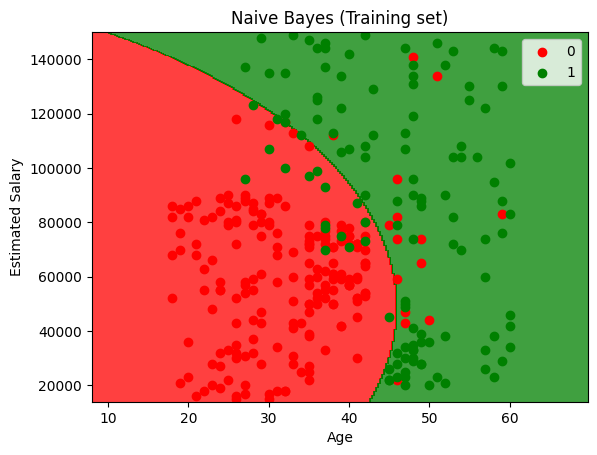

In [44]:
X_set,y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualisation of Test set result

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_19214/2289004396.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


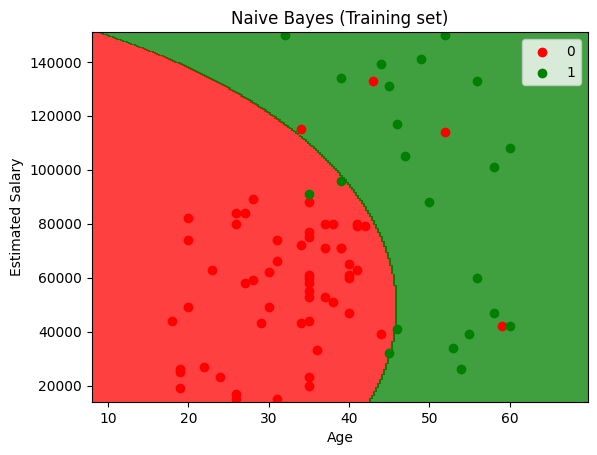

In [45]:
X_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()